setup and imports

In [1]:
import numpy as np
import math

# Problem 1
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [2]:
n3 = np.floor(1000/3)
n3_sum = 3 * n3 * (n3+1) / 2

n15 = np.floor(1000/15)
n15_sum = 15 * n15 * (n15 + 1) / 2

n5 = np.floor(999/5)
n5_sum = 5 * n5 * (n5 + 1) / 2

n5_sum + n3_sum - n15_sum

233168.0

a much easier way that I found among others' solutions:

In [3]:
print(sum(n for n in range(1000) if n % 3 == 0 or n % 5 == 0))

233168


# Problem 2
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with  and , the first  terms will be:
1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...
By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [2]:
def fibonacci_up_to(limit):
    a, b = 0, 1
    fib = []
    
    while a <= limit:
        fib.append(a)
        a, b = b, a + b
    
    return fib

fib = fibonacci_up_to(4000000)

In [6]:
even_valued_terms = 0
for i in fib:
    if i % 2 == 0:
        even_valued_terms += i

even_valued_terms

4613732

# Problem 3
The prime factors of 13195 are 5, 7, 13, and 29.

What is the largest prime factor of the number 600851475143?

In [4]:
def is_prime(n):
    if n <= 1:
        return False
    
    for i in range(2, n):
        if n % i == 0:
            return False
    
    return True

def primes_up_to(a):
    primes = []
    for i in range(2, a+1):
        if is_prime(i):
            primes.append(i)
    
    return primes


In [8]:
n = 600851475143
sqrt_n = math.isqrt(n)

In [ ]:
primes = primes_up_to(n)

So had to stop running because apparantly getting all prime numbers up to 600851475143 takes forever. 
In addition, we do not have to have all the prime numbers up to the large value we have. we need to take the square root of it.
let's use a built-in library

In [6]:
%pip install sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.0 MB/s  0:00:00 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sympy import primerange, prime
# listing prime numbers
# prime_factors = list(primerange(1, n))
# listing prime numbers up to the square root of it
prime_factors = list(primerange(1, sqrt_n))

In [ ]:
for i in prime_factors[::-1]:
    if n % i == 0:
        largest_prime = i
        break
print(f"the largest prime factor of {n} is {largest_prime}")

the largest prime factor of 600851475143 is 6857


# Problem 4
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 x 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [123]:
# a function to see if a number is palindromic

def is_palindromic(n):
    while n > 9:
        reverse_n = int(str(n)[::-1])
        if reverse_n == n:
            return True
        else:
            return False

In [124]:
# listing all the numbers that are the product of 2 3-digit numbers

ns = []
ns_str  = []
for i in range(100, 1000):
    for j in range(100, 1000):
        ns.append(i * j)
        ns_str.append(str(i)+" and "+str(j))

In [ ]:
# first we get the list of all palindromic numbers 

palindromics = []
for i in ns:
    if is_palindromic(i):
        palindromics.append(i)

In [126]:
# now we can get the index of the largest palindromic number

print(f"{max(palindromics)} is the largest palindromic number made from the product of 2 3-digit numbers of {ns_str[ns.index(max(palindromics))]}")
    

906609 is the largest palindromic number made from the product of 2 3-digit numbers of 913 and 993


# Problem 5

2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [131]:
# we define a function that gets inputs of the question, and returns the smallest number that is divisible by all the numbers in the range.

def is_divisible(a, b):
    i = 1
    while True:
        if all(i % j == 0 for j in range(a, b+1)):
            print(f"{i} is the smallest positive number that is evenly divisible by all of the numbers from {a} to {b}")
            break
        i += 1
            

In [133]:
import time

start = time.time()

is_divisible(1, 20)

end = time.time()

print(f"Runtime: {end - start:.4f} seconds")

232792560 is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20
Runtime: 79.2350 seconds


# Problem 6
The sum of the squares of the first ten natural numbers is,

$1^2$ + $2^2$ + ... $10^2$ = 385

The square of the sum of the first ten natural numbers is,

$(1+2+...+10)^2$ = $55^2$ = 3025

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is  
3025 - 385 = 2640 .

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [1]:
from IPython.display import Markdown, display

def sum_of_square(a):
    sum = 0
    for i in range(1, a+1):
        sum += i ** 2
    # print(f"the sum of the squares of the first {a} natural numbers is {sum}")
    return sum

def square_of_sum(a):
    sums = sum(list(range(1, a+1)))
    sum_squared = sums ** 2
    # print(f"the square of the sum of the first {a} natural numbers is {sum_squared}")
    return sum_squared

def dif_sum_sqs(a):
    dif = abs(square_of_sum(a) - sum_of_square(a))
    display(Markdown(
    f"The difference between the sum of the squares of the first **{a}** natural numbers and the square of the sum of them is **{dif}**"))


In [168]:
start = time.time()

dif_sum_sqs(100)

end = time.time()

print(f"Runtime: {end - start:.4f} seconds")

The difference between the sum of the squares of the first **100** natural numbers and the square of the sum of them is **25164150**

Runtime: 0.0038 seconds


# Problem 7

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the  10001st prime number?

In [189]:
# using primerange function we can list the prime numbers given a range.
# by trying various ranges we can see whether the list of prime numbers has a length of more than 10001 or no

def len_primes(n):
    length = len(list(primerange(1, n)))
    print(f"The length of the prime numbers up to {n} is {length}")



In [ ]:
len_primes(1000)
len_primes(10000)
len_primes(100000)
len_primes(150000) # This should do it 

The length of the prime numbers up to 1000 is 168
The length of the prime numbers up to 10000 is 1229
The length of the prime numbers up to 100000 is 9592
The length of the prime numbers up to 150000 is 13848


In [272]:
# Now we give the index of 10000 to return the 10001th prime number 
our_prime = list(primerange(1, 150000))[10000]
display(Markdown(f"The 10001th prime number is **{our_prime}**"))

The 10001th prime number is **104743**

# Problem 8

The four adjacent digits in the 1000-digit number that have the greatest product are 9 x 9 x 8 x 9 = 5832.

73167176531330624919225119674426574742355349194934 <br>
96983520312774506326239578318016984801869478851843 <br>
85861560789112949495459501737958331952853208805511<br>
12540698747158523863050715693290963295227443043557<br>
66896648950445244523161731856403098711121722383113<br>
62229893423380308135336276614282806444486645238749<br>
30358907296290491560440772390713810515859307960866<br>
70172427121883998797908792274921901699720888093776<br>
65727333001053367881220235421809751254540594752243<br>
52584907711670556013604839586446706324415722155397<br>
53697817977846174064955149290862569321978468622482<br>
83972241375657056057490261407972968652414535100474<br>
82166370484403199890008895243450658541227588666881<br>
16427171479924442928230863465674813919123162824586<br>
17866458359124566529476545682848912883142607690042<br>
24219022671055626321111109370544217506941658960408<br>
07198403850962455444362981230987879927244284909188<br>
84580156166097919133875499200524063689912560717606<br>
05886116467109405077541002256983155200055935729725<br>
71636269561882670428252483600823257530420752963450<br>

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [265]:
n = int("""
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
""".replace("\n", "").strip())

In [ ]:
product_lst = {}
for i in range(len(str(n))):
    product = 1
    if i+13 in range(len(str(n))):
        for j in list(str(n)[i:i+13]):
            product = int(j) * product
        product_lst[str(n)[i:i+13]] = product
        

In [271]:
max_key = max(product_lst, key=product_lst.get)
max_value = product_lst[max_key]

display(Markdown(f"The 13 adjacent numbers **{max_key}** has the greatest product which is equal to **{max_value}**"))

The 13 adjacent numbers **5576689664895** has the greatest product which is equal to **23514624000**

# Problem 9

A Pythagorean triplet is a set of three natural numbers, $a < b < c$, for which,

$$
a^2 + b^2 = c^2
$$

For example, $3^2 + 4^2 = 9 + 16 = 25 = 5^2$ .

There exists exactly one Pythagorean triplet for which $a + b + c = 1000$. <br>
Find the product $abc$ .

In [7]:
def find_triplet(d):
    for a in range(1, d):
        for b in range(1, d):
            for c in range(1, d):
                if a < b < c and a + b + c == d and a**2 + b**2 == c**2:
                    product = a * b * c
                    display(Markdown(
                        f"The Pythagorean triplet is **{a}**, **{b}**, and **{c}**, "
                        f"and their product is **{product}**"
                    ))
                    return   

In [8]:
find_triplet(1000)

The Pythagorean triplet is **200**, **375**, and **425**, and their product is **31875000**

# Problem 10

The sum of the primes below $10$ is $2 + 3 + 5 + 7 = 17$.

Find the sum of all the primes below two million.

In [12]:
primes = list(primerange(1, 2e6))

In [15]:
sum(primes)

142913828922

# Problem 11

In the 20 x 20 grid below, four numbers along a diagonal line have been marked in red.
<pre>
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 <span style="color:red">26</span> 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 <span style="color:red">63</span> 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 <span style="color:red">78</span> 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 <span style="color:red">14</span> 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
</pre>

The product of these numbers is 26 x 63 x 78 x 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction
(up, down, left, right, or diagonally) in the 20 x 20 grid?



In [73]:
n = """08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48"""

n = n.replace("\n", " ")

In [75]:
numbers = [int(num) for num in n.split()]
grid = np.array(numbers).reshape(20, 20)

In [133]:
def main_diagonal():
    products = {}
    for i in range(0,17):
        for j in range(0,17):
            values = str([grid[i, j],grid[i+1, j+1],grid[i+2, j+2],grid[i+3, j+3]])
            product = grid[i, j]*grid[i+1, j+1]*grid[i+2, j+2]*grid[i+3, j+3]
            key = (f"line {i}", values)
            products[key]=product
    max_key = max(products, key=products.get)
    max_value = products[max_key]

    display(Markdown(f"The 4 adjacent numbers **{max_key}** has the greatest product which is equal to **{max_value}**"))
    return products

In [171]:
def anti_diagonal():
    products = {}
    for i in range(0, 17):
        for j in reversed(range(3, 20)):
            values = str([grid[i, j],grid[i+1, j-1],grid[i+2, j-2],grid[i+3, j-3]])
            product = grid[i, j]*grid[i+1, j-1]*grid[i+2, j-2]*grid[i+3, j-3]
            key = (f"line {i}", values)
            products[key]=product
    max_key = max(products, key=products.get)
    max_value = products[max_key]

    display(Markdown(f"The 4 adjacent numbers **{max_key}** has the greatest product which is equal to **{max_value}**"))
    return products

In [173]:
def up_down():
    products = {}
    for i in range(0, 17):
        for j in range(0, 20):
            values = str([grid[i, j],grid[i+1, j],grid[i+2, j],grid[i+3, j]])
            product = grid[i, j]*grid[i+1, j]*grid[i+2, j]*grid[i+3, j]
            key = (f"line {i}", values)
            products[key]=product
    max_key = max(products, key=products.get)
    max_value = products[max_key]

    display(Markdown(f"The 4 adjacent numbers **{max_key}** has the greatest product which is equal to **{max_value}**"))
    return products

In [178]:
def left_right():
    products = {}
    for i in range(0, 20):
        for j in range(0, 17):
            values = str([grid[i, j],grid[i, j+1],grid[i, j+2],grid[i, j+3]])
            product = grid[i, j]*grid[i, j+1]*grid[i, j+2]*grid[i, j+3]
            key = (f"line {i}", values)
            products[key]=product
    max_key = max(products, key=products.get)
    max_value = products[max_key]

    display(Markdown(f"The 4 adjacent numbers **{max_key}** has the greatest product which is equal to **{max_value}**"))
    return products

In [174]:
main_diagonal_products = main_diagonal()


The 4 adjacent numbers **('line 16', '[94, 99, 71, 61]')** has the greatest product which is equal to **40304286**

In [175]:
anti_diagonal_products = anti_diagonal()

The 4 adjacent numbers **('line 12', '[89, 94, 97, 87]')** has the greatest product which is equal to **70600674**

In [176]:
up_down_products = up_down()

The 4 adjacent numbers **('line 6', '[66, 91, 88, 97]')** has the greatest product which is equal to **51267216**

In [179]:
left_right_products = left_right()

The 4 adjacent numbers **('line 8', '[78, 78, 96, 83]')** has the greatest product which is equal to **48477312**

In [181]:
max(40304286, 70600674, 51267216, 48477312)

70600674

# Problem 12

The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. The first ten terms would be:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mn>1</mn>
  <mo>,</mo>
  <mn>3</mn>
  <mo>,</mo>
  <mn>6</mn>
  <mo>,</mo>
  <mn>10</mn>
  <mo>,</mo>
  <mn>15</mn>
  <mo>,</mo>
  <mn>21</mn>
  <mo>,</mo>
  <mn>28</mn>
  <mo>,</mo>
  <mn>36</mn>
  <mo>,</mo>
  <mn>45</mn>
  <mo>,</mo>
  <mn>55</mn>
  <mo>,</mo>
  <mo>&#x2026;</mo>
</math>

Let us list the factors of the first seven triangle numbers:

$$
\small
\begin{aligned}
\mathbf{1}  &: 1 \\
\mathbf{3}  &: 1, 3 \\
\mathbf{6}  &: 1, 2, 3, 6 \\
\mathbf{10} &: 1, 2, 5, 10 \\
\mathbf{15} &: 1, 3, 5, 15 \\
\mathbf{21} &: 1, 3, 7, 21 \\
\mathbf{28} &: 1, 2, 4, 7, 14, 28
\end{aligned}
$$

We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

In [1]:
# First we need a function to generate triangle numbers up to a threshold (or potentially up the first n numbers)
# Then we need to have the factors of each numbers 
# Then we need to return the first number that has over five hundred divisors

In [68]:
def triangles_1(n):
    triangles = []
    i = 1
    n_naturals = [1]
    while True:
        added = sum(n_naturals)
        triangles.append(added)
        if i == n:
            return triangles
        else:
            i += 1
            n_naturals.append(i)

In [69]:
# but there is a more efficient way: THE FORMULA which is n(n+1)/2

def triangles_2(n):
    return [i * (i + 1) // 2 for i in range(1, n + 1)]

In [73]:
triangless = triangles_2(10000000)

In [74]:
len(triangless)

10000000

In [75]:
triangless[-1]

50000005000000

none worked because the dimensions are high. had to ask gpt to write it efficiently

In [76]:
import math

def divisor_count(n):
    count = 0
    root = int(math.isqrt(n))   # exact integer sqrt
    for i in range(1, root + 1):
        if n % i == 0:
            count += 2 if i != n // i else 1
    return count

In [79]:
n = 1
while True:
    if n % 2 == 0:
        a, b = n // 2, n + 1
    else:
        a, b = n, (n + 1) // 2
    
    divs = divisor_count(a) * divisor_count(b)
    
    if divs > 500:
        Tn = n * (n + 1) // 2
        print("First triangular number with over 500 divisors:", Tn)
        break
    n += 1

First triangular number with over 500 divisors: 76576500


# Problem 13

Work out the first ten digits of the sum of the following one-hundred 50-digit numbers. 

<center>
<pre style = "font-size: 11px;">
37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690
</pre>
</center>


In [ ]:
"""
First we turn this giant digits of numbers into 100 50-digit numbers in an array that will naturally have a length of 100. 


"""


In [10]:
n = """37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690"""


In [11]:
n = n.replace("\n", "").replace(" ", "")

In [12]:
nums = [int(n[i:i+50]) for i in range(0, len(n), 50)]

In [ ]:
int(str(sum(nums))[:10])

5537376230

In [18]:
from IPython.display import Markdown, display

display(Markdown(f"The first 10 digits of the sum of the listed 100 numbers is **{int(str(sum(nums))[:10])}**"))

The first 10 digits of the sum of the listed 100 numbers is **5537376230**

# Problem 14

The following iterative sequence is defined for the set of positive integers:

- n → n / 2  (if n is even)  
- n → 3n + 1 (if n is odd)

Using the rule above and starting with 13, we generate the following sequence:

$$13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1$$

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms.  
Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

**Note:** Once the chain starts, the terms are allowed to go above one million.

In [ ]:
def chain(n):
    chain_list = [n]
    i = 0
    while n > 1:
        # i += 1
        if n % 2 == 0:
            n = n/2
            chain_list.append(n)
        elif n % 2 == 1:
            n = 3*n + 1
            chain_list.append(n)
    return(chain_list)


def longest_chain(n):
    chain_len = []
    for i in range(0, n):
        chain_list = chain(i)
        chain_len.append(len(chain_list))
    return chain_len


In [59]:
n = 1000000

longestchain = longest_chain(n)

number = longestchain.index(max(longestchain))

In [60]:
from IPython.display import Markdown, display

display(Markdown(f"The starting number **{number}** under {n} produces the longest chain"))


The starting number **837799** under 1000000 produces the longest chain

# Problem 15

Starting in the top left corner of a 2 x 2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

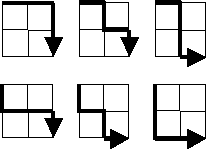

How many such routes are there through a 20 x 20 grid?


So with 2x2 grid, if we have only the paths of right and down, we have 2+2 blocks from top left corner to the bottom right corner.
each block has two options of either going right or going down. <br>
this means we have to go in total 2 to right and 2 to down. <br>
if we had 3x3 grid we had to go 3 to right and 3 to down.<br>
so this means we need to n choose k or use the combinations.<br>
n being the number of side choices we have at each block. k being the number of blocks which is m+n in a mxn grid  <br>
the formula is as below:

$\frac{(n+k)!}{k!n!}$


In [42]:
from IPython.display import Markdown, display

def factorial(n):
    factorial = n
    if n == 0:
        factorial = 0
        return factorial
    for i in range(1, n-1):
        factorial = factorial * (n-i)
    return factorial

def grid_routes(a, b): # a axb grid
    comb = factorial(a + b) / (factorial(a) * factorial(b))
    display(Markdown(f"There are **{comb}** such routes through a {a} x {b} grid"))

In [43]:
grid_routes(20, 20)

There are **137846528820.0** such routes through a 20 x 20 grid

# Problem 16

$ 2^{15} = 32768 $ and the sum of its digits is $3 + 2 + 7 + 6 + 8 = 26$ .

What is the sum of the digits of the number $2 ^ {1000}$?

In [9]:
def power_digits_sum(a, b):
    power = a ** b
    digits = [int(i) for i in list(str(power))]
    sum_digits = sum(digits)

    return sum_digits

In [11]:
power_digits_sum(2, 1000)

1366

# Problem 17

If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?


NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

In [166]:
n_1_9 = [
    '', 'one', 'two', 'three', 'four', 'five', 
    'six', 'seven', 'eight', 'nine'
]

n_10_19 = [
    '', 'ten',
    'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen',
    'sixteen', 'seventeen', 'eighteen', 'nineteen'
]

tens = [
    '', '', 'twenty', 'thirty', 'forty', 'fifty',
    'sixty', 'seventy', 'eighty', 'ninety'
]

n_20_99 = []
for i in tens[2:]:
    for j in n_1_9:
        n_20_99.append(i + j)

n_1_99 = n_1_9[1:] + n_10_19[1:] + n_20_99

n_100_1000 = []
for i in n_1_9[1:]:
    n_100_1000.append(i + 'hundred')
    for j in n_1_99:
        n_100_1000.append(i + 'hundred' + 'and' + j)
n_100_1000.append('onethousand')

n_1_1000 = n_1_99 + n_100_1000 


In [181]:
from IPython.display import Markdown, display

def sum_letters(n):    
    letters = 0
    for i in n_1_1000[:n+1]:
        letters += len(i)

    return display(Markdown(f"The number of letters used for numbers 1 to {n} is **{letters}**"))

In [182]:
sum_letters(1000)

The number of letters used for numbers 1 to 1000 is **21124**

# Problem 18

By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.
<center>
<pre>
<span style="color:red">3</span>
<span style="color:red">7</span> 4
2 <span style="color:red">4</span> 6
8 5 <span style="color:red">9</span> 3
</pre>
</center>
That is, 3 + 7 + 4 + 9 = 23 .

Find the maximum total from top to bottom of the triangle below:
<center>
<pre>
75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
</pre>
</center>
NOTE: As there are only 16384 routes, it is possible to solve this problem by trying every route. However, Problem 67, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)

In [136]:
n = """
75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
"""

In [137]:
numbers = [int(num) for num in n.split()]

In [138]:
main_list = []
max_list = []
n = 0
i = 0

while i < len(numbers):
    temp = numbers[i:i+n+1]
    main_list.append(temp)

    i += n + 1
    n += 1

main_list

[[75],
 [95, 64],
 [17, 47, 82],
 [18, 35, 87, 10],
 [20, 4, 82, 47, 65],
 [19, 1, 23, 75, 3, 34],
 [88, 2, 77, 73, 7, 63, 67],
 [99, 65, 4, 28, 6, 16, 70, 92],
 [41, 41, 26, 56, 83, 40, 80, 70, 33],
 [41, 48, 72, 33, 47, 32, 37, 16, 94, 29],
 [53, 71, 44, 65, 25, 43, 91, 52, 97, 51, 14],
 [70, 11, 33, 28, 77, 73, 17, 78, 39, 68, 17, 57],
 [91, 71, 52, 38, 17, 14, 91, 43, 58, 50, 27, 29, 48],
 [63, 66, 4, 68, 89, 53, 67, 30, 73, 16, 69, 87, 40, 31],
 [4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23]]

In [139]:
max_list = [75]
i = 0
n = 1

for num in main_list[1:]:
    i = max(i, i+1, key=lambda x: num[x])
    n += 1
    max_list.append(num[i])

In [143]:
max_list

[75, 95, 47, 87, 82, 75, 73, 28, 83, 47, 43, 73, 91, 67, 98]

In [142]:
sum(max_list)

1064

but apparantly this answer was not correct because we are looking for the maximum summation not choosing the maximum value at each row!!

In [144]:
# Start from the second-to-last row and work upward
for i in range(len(main_list) - 2, -1, -1):
    for j in range(len(main_list[i])):
        # Add the maximum of the two adjacent numbers below
        main_list[i][j] += max(main_list[i+1][j], main_list[i+1][j+1])

# The top element now contains the maximum total
print(main_list[0][0])

1074
